# DataHacks2020: Science Track

## Exploratory Data Analysis

### Notes:
* Five or more relatied sections from any topic of interest
* NLP on questions
* 2001-2016 time span
* srat cat 2 and 3 are all null
* response is not response its null?, DataValue contains the values
* plotly
  
* Folium-good for: heat maps (cities) prob not 
* geopandas (use this): 
* %matplotlib notebook/inline

* links to how the data was gathered:  
* https://www.cdc.gov/mmwr/pdf/rr/rr6401.pdf  
* https://healthdata.gov/dataset/us-chronic-disease-indicators-cdi  
* https://chronicdata.cdc.gov/Chronic-Disease-Indicators/U-S-Chronic-Disease-Indicators-CDI-/g4ie-h725

### Ideas:
* Take words in a question and predict/classify the topic. Can possibly use outside sources.

Current Plan:
* Analyze npaw (health), use chorpleth chart, plot individual points
* analyze one more topic (or section within these topics) and same two plots
* create an aggregate plot with all data as individual points

* combine the gender and race charts (using the correct data this time)

In [237]:
import numpy as np
import pandas as pd
import re
import plotly.graph_objects as go
import plotly.express as px

In [2]:
raw_data = pd.read_csv('data/U.S._Chronic_Disease_Indicators__CDI_.csv')

In [3]:
raw_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2015,2015,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_2,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2012,2012,DC,District of Columbia,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,11,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2012,2012,GU,Guam,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,66,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2012,2012,PR,Puerto Rico,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,72,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2012,2012,US,United States,APIS,Alcohol,Amount of alcohol excise tax by beverage type ...,NaN,$,US Dollars,...,59,ALC,ALC8_0_1,USD,OVERALL,OVR,NaN,NaN,NaN,NaN


In [4]:
# attributes to note: YearStart/YearEnd, Tpoic, Question, Response, DataValue, Geolocation, StartificationCategory
raw_data.describe()

,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,519718.000000,519718.000000,3.503350e+05,311062.000000,311062.000000,519718.000000
mean,2013.141885,2013.162754,8.917742e+02,46.759401,58.991287,30.993144
std,1.777622,1.762672,1.833073e+04,77.492628,88.668862,17.723341
min,2001.000000,2001.000000,0.000000e+00,0.200000,0.420000,1.000000
25%,2012.000000,2012.000000,1.845500e+01,12.700000,18.900000,17.000000
50%,2013.000000,2013.000000,4.100000e+01,30.200000,43.800000,30.000000
75%,2015.000000,2015.000000,7.030000e+01,55.400000,70.400000,45.000000
max,2016.000000,2016.000000,2.600878e+06,1330.660000,2088.000000,78.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519718 entries, 0 to 519717
Data columns (total 34 columns):
YearStart                    519718 non-null int64
YearEnd                      519718 non-null int64
LocationAbbr                 519718 non-null object
LocationDesc                 519718 non-null object
DataSource                   519718 non-null object
Topic                        519718 non-null object
Question                     519718 non-null object
Response                     79188 non-null object
DataValueUnit                476046 non-null object
DataValueType                519718 non-null object
DataValue                    374564 non-null object
DataValueAlt                 350335 non-null float64
DataValueFootnoteSymbol      227318 non-null object
DatavalueFootnote            227152 non-null object
LowConfidenceLimit           311062 non-null float64
HighConfidenceLimit          311062 non-null float64
StratificationCategory1      519718 non-null object
Strat

Response, ResponseID, Stratification2/3, StratificationID2/3, StratificationCategory2/3, and StratificationCategoryID2/3 all have ~ 79000 non-null, which is suspicious

In [6]:
null_cols = ['Response', 'ResponseID', 'Stratification2', 'Stratification3', 
             'StratificationCategory2', 'StratificationCategory3', 'StratificationID2', 'StratificationID3', 
             'StratificationCategoryID2', 'StratificationCategoryID3']

for col in null_cols:
    print(raw_data[col].value_counts())

     79188
Name: Response, dtype: int64
     79176
Name: ResponseID, dtype: int64
     79188
Name: Stratification2, dtype: int64
     79188
Name: Stratification3, dtype: int64
     79188
Name: StratificationCategory2, dtype: int64
     79188
Name: StratificationCategory3, dtype: int64
     79189
Name: StratificationID2, dtype: int64
     79188
Name: StratificationID3, dtype: int64
     79189
Name: StratificationCategoryID2, dtype: int64
     79188
Name: StratificationCategoryID3, dtype: int64


All of these columns are blank/null, so we can safely remove them.

In [7]:
data = raw_data.drop(null_cols, axis=1)

There is both a Topic and TopicID column, which could be redundant.

In [8]:
data[['Topic', 'TopicID']].groupby('Topic')['TopicID'].nunique()

Topic
Alcohol                                            1
Arthritis                                          1
Asthma                                             1
Cancer                                             1
Cardiovascular Disease                             1
Chronic Kidney Disease                             1
Chronic Obstructive Pulmonary Disease              1
Diabetes                                           1
Disability                                         1
Immunization                                       1
Mental Health                                      1
Nutrition, Physical Activity, and Weight Status    1
Older Adults                                       1
Oral Health                                        1
Overarching Conditions                             1
Reproductive Health                                1
Tobacco                                            1
Name: TopicID, dtype: int64

Indeed, Topic and TopicID are redundant, so we can remove one. In this case, TopicID is mor ambiguous, so we remove it. However, we will keep a map for reference.

In [9]:
TopicIdToTopic = data[['Topic', 'TopicID']].drop_duplicates().set_index('TopicID')
data = data.drop('TopicID', axis=1)

We will now look at the proportion of null values in each of the remaining columns:

In [20]:
data.isna().mean()

YearStart                    0.000000
YearEnd                      0.000000
LocationAbbr                 0.000000
LocationDesc                 0.000000
DataSource                   0.000000
Topic                        0.000000
Question                     0.000000
DataValueUnit                0.084030
DataValueType                0.000000
DataValue                    0.279294
DataValueAlt                 0.325913
DataValueFootnoteSymbol      0.562613
DatavalueFootnote            0.562932
LowConfidenceLimit           0.401479
HighConfidenceLimit          0.401479
StratificationCategory1      0.000000
Stratification1              0.000000
GeoLocation                  0.006933
LocationID                   0.000000
QuestionID                   0.000000
DataValueTypeID              0.000000
StratificationCategoryID1    0.000000
StratificationID1            0.000000
dtype: float64

Let's now look at the topics:

In [10]:
data.Topic.value_counts(normalize=True)

Diabetes                                           0.153220
Chronic Obstructive Pulmonary Disease              0.151484
Cardiovascular Disease                             0.145823
Arthritis                                          0.080361
Overarching Conditions                             0.075737
Asthma                                             0.075543
Nutrition, Physical Activity, and Weight Status    0.064691
Alcohol                                            0.061283
Tobacco                                            0.056388
Older Adults                                       0.029439
Cancer                                             0.027132
Chronic Kidney Disease                             0.023849
Oral Health                                        0.021429
Mental Health                                      0.013902
Immunization                                       0.010044
Disability                                         0.005711
Reproductive Health                     

There is the most data for Diabetes, so we'll explore it first.

In [11]:
diabetes = data.loc[data.Topic=='Diabetes']
diabetes.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
258,2012,2012,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Gender,Male,"(40.485010283, -88.997710178)",17,DIA5_0,AGEADJPREV,GENDER,GENM
262,2011,2011,IL,Illinois,BRFSS,Diabetes,Foot examination among adults aged >= 18 years...,%,Crude Prevalence,NaN,...,NaN,NaN,Gender,Male,"(40.485010283, -88.997710178)",17,DIA5_0,CRDPREV,GENDER,GENM
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,...,42.1,61.7,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA1_1,AGEADJRATE,GENDER,GENF
303,2011,2011,KS,Kansas,NVSS,Diabetes,Mortality with diabetic ketoacidosis reported ...,NaN,Number,27,...,NaN,NaN,Overall,Overall,"(38.3477403, -98.200781227)",20,DIA1_2,NMBR,OVERALL,OVR
308,2016,2016,FL,Florida,BRFSS,Diabetes,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,48,...,42.9,53.2,Race/Ethnicity,"White, non-Hispanic","(28.932040377, -81.928960539)",12,DIA12_1,CRDPREV,RACE,WHT


In [57]:
diabetes.iloc[123]

YearStart                                                                 2016
YearEnd                                                                   2016
LocationAbbr                                                                GA
LocationDesc                                                           Georgia
DataSource                                                               BRFSS
Topic                                                                 Diabetes
Question                     Dilated eye examination among adults aged >= 1...
DataValueUnit                                                                %
DataValueType                                          Age-adjusted Prevalence
DataValue                                                                  NaN
DataValueAlt                                                               NaN
DataValueFootnoteSymbol                                                      -
DatavalueFootnote                                   

In [13]:
diabetes.Question.value_counts()

Mortality due to diabetes reported as any listed cause of death                                        6135
Mortality with diabetic ketoacidosis reported as any listed cause of death                             6135
Prevalence of depressive disorders among adults aged >= 18 years with diagnosed diabetes               5220
Prevalence of diagnosed diabetes among adults aged >= 18 years                                         5220
Influenza vaccination among noninstitutionalized adults aged >= 65 years with diagnosed diabetes       5220
Influenza vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes       5220
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with diagnosed diabetes    5220
Foot examination among adults aged >= 18 years with diagnosed diabetes                                 5220
Glycosylated hemoglobin measurement among adults aged >= 18 years with diagnosed diabetes              5220
Adults with diagnosed diabet

In [14]:
diabetes.loc[diabetes.Question=='Mortality due to diabetes reported as any listed cause of death']

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,...,42.1,61.7,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA1_1,AGEADJRATE,GENDER,GENF
366,2010,2010,AR,Arkansas,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,1091,...,NaN,NaN,Gender,Female,"(34.748650124, -92.274490743)",5,DIA1_1,NMBR,GENDER,GENF
422,2012,2012,WV,West Virginia,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,,...,NaN,NaN,Race/Ethnicity,Hispanic,"(38.665510202, -80.712640135)",54,DIA1_1,CRDRATE,RACE,HIS
444,2014,2014,AL,Alabama,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,,...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"(32.840571122, -86.631860762)",1,DIA1_1,AGEADJRATE,RACE,API
472,2010,2010,WY,Wyoming,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,306,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic","(43.235541343, -108.109830353)",56,DIA1_1,NMBR,RACE,WHT
482,2011,2011,FL,Florida,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,1499,...,NaN,NaN,Race/Ethnicity,Hispanic,"(28.932040377, -81.928960539)",12,DIA1_1,NMBR,RACE,HIS
712,2012,2012,CO,Colorado,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,141,...,NaN,NaN,Race/Ethnicity,"Black, non-Hispanic","(38.843840757, -106.133610921)",8,DIA1_1,NMBR,RACE,BLK
785,2013,2013,MS,Mississippi,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,144.1,...,135.9,152.2,Race/Ethnicity,"Black, non-Hispanic","(32.745510099, -89.538030825)",28,DIA1_1,AGEADJRATE,RACE,BLK
907,2014,2014,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,,...,NaN,NaN,Race/Ethnicity,Hispanic,"(64.845079957001, -147.722059036)",2,DIA1_1,NMBR,RACE,HIS
977,2012,2012,OH,Ohio,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,77.1,...,75.1,79.0,Gender,Female,"(40.060210141, -82.404260056)",39,DIA1_1,AGEADJRATE,GENDER,GENF


In [52]:
# diabetes.loc[diabetes.Question=='Mortality with diabetic ketoacidosis reported as any listed cause of death']
diabetes.loc[diabetes.QuestionID=='DIA1_1'].groupby('Stratification1').mean()

,YearStart,YearEnd,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
Stratification1,,,,,,
American Indian or Alaska Native,2012.0,2012.0,117.125076,94.767431,165.504128,28.960784
Asian or Pacific Islander,2012.0,2012.0,105.904524,30.662500,50.707143,28.960784
"Black, non-Hispanic",2012.0,2012.0,364.989833,89.316500,111.840750,28.960784
Female,2012.0,2012.0,723.739216,63.359020,71.746078,28.960784
Hispanic,2012.0,2012.0,217.790451,37.609115,56.425260,28.960784
Male,2012.0,2012.0,810.758431,82.541373,92.861961,28.960784
Overall,2012.0,2012.0,2858.066154,73.468654,79.885385,29.538462
"White, non-Hispanic",2012.0,2012.0,1185.783529,70.259412,77.284118,28.960784


It appears that each question corresponds to its own QuestionID.  
For example, DIA1_1 corresponse to : 'Mortality due to diabetes reported as any listed cause of death'

In [63]:
# most common questions
# data.Question.value_counts()
# ' '.join(data.Question.head())

In [62]:
# pd.Series(data.Question.drop_duplicates().str.cat(sep=' ').split()).value_counts()

In [61]:
# pd.Series(' '.join(data.Question).split()).value_counts()

In [30]:
# data.Question.str.cat(sep=' ') # big lag

## Visualizations

### Visualization 1: Diabetes mortality rate by race

In [122]:
diab_gender_mortality = diabetes.loc[
    (diabetes.QuestionID=='DIA1_1') & 
    (diabetes.StratificationCategoryID1=='GENDER')
]
diab_gender_mortality.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,...,42.1,61.7,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA1_1,AGEADJRATE,GENDER,GENF
366,2010,2010,AR,Arkansas,NVSS,Diabetes,Mortality due to diabetes reported as any list...,NaN,Number,1091,...,NaN,NaN,Gender,Female,"(34.748650124, -92.274490743)",5,DIA1_1,NMBR,GENDER,GENF


Here, we will assume that all DataValues are cases per 100,000

In [123]:
# select the stratification and datavalue columns, then rename them
diab_gender_mortality = diab_gender_mortality[['Stratification1', 'DataValue']].rename(
    columns={'Stratification1':'Gender', 'DataValue':'Mortality Rate (per 100,000)'}
)

In [124]:
# currently, Mortality Rate is a string, so convert it to a float
diab_gender_mortality = diab_gender_mortality.astype({'Mortality Rate (per 100,000)': 'float64'})

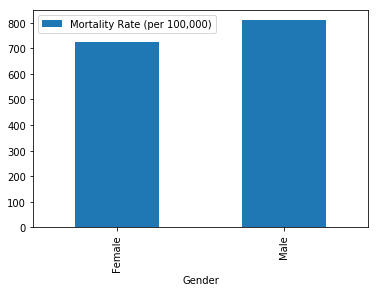

In [125]:
diab_gender_mortality.groupby('Gender').mean().plot.bar()

### Visualization 2: Diabetes mortality by race

In [146]:
diab_race_mortality = diabetes.loc[
    (diabetes.QuestionID=='DIA1_1') & 
    (diabetes.StratificationCategoryID1=='RACE')
]
diab_race_mortality.head(2)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
422,2012,2012,WV,West Virginia,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,,...,NaN,NaN,Race/Ethnicity,Hispanic,"(38.665510202, -80.712640135)",54,DIA1_1,CRDRATE,RACE,HIS
444,2014,2014,AL,Alabama,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,,...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"(32.840571122, -86.631860762)",1,DIA1_1,AGEADJRATE,RACE,API


We will again assume that all DataValues are cases per 100,000

In [147]:
# select the stratification and datavalue columns, then rename them
diab_race_mortality = diab_race_mortality[['Stratification1', 'DataValue']].rename(
    columns={'Stratification1':'Race', 'DataValue':'Mortality Rate (per 100,000)'}
)

In [148]:
diab_race_mortality.head()

,Race,"Mortality Rate (per 100,000)"
422,Hispanic,
444,Asian or Pacific Islander,
472,"White, non-Hispanic",306
482,Hispanic,1499
712,"Black, non-Hispanic",141


We will now remove blank values

In [161]:
# strips whitespaces and removes blanks
diab_race_mortality = diab_race_mortality[(diab_race_mortality['Mortality Rate (per 100,000)'].str.strip() != '')]

In [162]:
# currently, Mortality Rate is a string, so convert it to a float
diab_race_mortality = diab_race_mortality.astype({'Mortality Rate (per 100,000)': 'float64'})

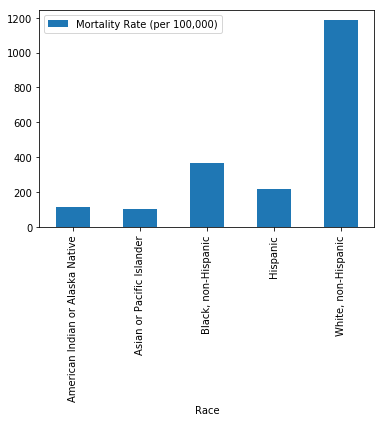

In [164]:
diab_race_mortality.groupby('Race').mean().plot.bar()

Interestingly, the mortality rate for White, non-Hispanic is highest.  
Let's take a look at this demographic.

In [168]:
diab_race_mortality.groupby('Race').describe()

Mortality Rate (per 100,000)               \
                                                        count         mean   
Race                                                                         
American Indian or Alaska Native                        327.0   117.125076   
Asian or Pacific Islander                               420.0   105.904524   
Black, non-Hispanic                                     600.0   364.989833   
Hispanic                                                576.0   217.790451   
White, non-Hispanic                                     765.0  1185.783529   

                                                                            \
                                          std   min     25%     50%    75%   
Race                                                                         
American Indian or Alaska Native    78.115036  20.0  57.750  108.30  150.1   
Asian or Pacific Islander          372.821451   9.7  26.950   40.00   63.0   
Black, non-Hispanic                621.578902  27.0  84.875  110.80  171.5   
Hispanic                           864.069785   6.5  26.900   48.65   86.0   
White, non-Hispanic               2446.239414  16.6  64.200   86.00  993.0   

                                           
                                      max  
Race                                       
American Indian or Alaska Native    510.0  
Asian or Pacific Islander          3596.0  
Black, non-Hispanic                3027.0  
Hispanic                           7576.0  
White, non-Hispanic               16248.0

In [179]:
# TODO, continue analysis?

### Visualization 3: Diabetes mortality by geographical location

In [316]:
# we care more about proportion than count, so select cases per 100,000
diab_mortality = diabetes.loc[(diabetes.QuestionID=='DIA1_1') & (diabetes.DataValueUnit=='cases per 100,000')]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
276,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,51.9,...,42.1,61.7,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA1_1,AGEADJRATE,GENDER,GENF
422,2012,2012,WV,West Virginia,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,,...,NaN,NaN,Race/Ethnicity,Hispanic,"(38.665510202, -80.712640135)",54,DIA1_1,CRDRATE,RACE,HIS
444,2014,2014,AL,Alabama,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,,...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,"(32.840571122, -86.631860762)",1,DIA1_1,AGEADJRATE,RACE,API
785,2013,2013,MS,Mississippi,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,144.1,...,135.9,152.2,Race/Ethnicity,"Black, non-Hispanic","(32.745510099, -89.538030825)",28,DIA1_1,AGEADJRATE,RACE,BLK
977,2012,2012,OH,Ohio,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,77.1,...,75.1,79.0,Gender,Female,"(40.060210141, -82.404260056)",39,DIA1_1,AGEADJRATE,GENDER,GENF
1078,2010,2010,AK,Alaska,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,36.4,...,29.8,43.0,Gender,Female,"(64.845079957001, -147.722059036)",2,DIA1_1,CRDRATE,GENDER,GENF
1171,2012,2012,AZ,Arizona,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,72.4,...,69.7,75.1,Race/Ethnicity,"White, non-Hispanic","(34.86597028, -111.763811277)",4,DIA1_1,CRDRATE,RACE,WHT
1316,2011,2011,DC,District of Columbia,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,163.2,...,149.0,177.4,Race/Ethnicity,"Black, non-Hispanic","(38.907192, -77.036871)",11,DIA1_1,CRDRATE,RACE,BLK
1457,2011,2011,WY,Wyoming,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Age-adjusted Rate,59.7,...,53.1,66.3,Race/Ethnicity,"White, non-Hispanic","(43.235541343, -108.109830353)",56,DIA1_1,AGEADJRATE,RACE,WHT
1577,2014,2014,WA,Washington,NVSS,Diabetes,Mortality due to diabetes reported as any list...,"cases per 100,000",Crude Rate,76.4,...,73.3,79.5,Gender,Female,"(47.522278629, -120.47001079)",53,DIA1_1,CRDRATE,GENDER,GENF


Lets first plot the overall diabetes rate by state:

In [370]:
diab_overall = diab_mortality[diab_mortality.Stratification1=='Overall']
# diab_overall # choropleth map it such that countries higher than average diabetes rates are red, and opposite is blue/green

For a more fair comparison, we will use the Age-adjusted Rate to compare states. We must also remove the US and Washington D.C. averages. Keep the US average for reference.

In [371]:
diab_overall = diab_overall[diab_overall.DataValueTypeID=='AGEADJRATE']

In [372]:
# remove blank data values to convert to float and rename
diab_overall = diab_overall[(diab_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
diab_overall = diab_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

In [373]:
# get US average
mean_US_diab_mortality = diab_overall[diab_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

In [374]:
# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = diab_overall.loc[(diab_overall.LocationAbbr!='US') & (diab_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

In [378]:
# create choropleth chart
diab_fig_adj = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_diab_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
diab_fig_adj.update_layout(
    title_text = 'Adjusted Average Diabetes Mortality Rate by State (2010-2014)',
    geo_scope='usa', # limite map scope to USA
)

We can see that Oklahoma and West Virginia have notably high mortality rates. Let's repeat the process using the crude values to compare.

In [387]:
# same process

diab_overall = diab_mortality[diab_mortality.Stratification1=='Overall']

# this time, select crude rate
diab_overall = diab_overall[diab_overall.DataValueTypeID=='CRDRATE']

# remove blank data values to convert to float and rename
diab_overall = diab_overall[(diab_overall['DataValue'].str.strip() != '')].rename(
    columns={'DataValue':'Mortality Rate (per 100,000)'}
)


# convert data values to float
diab_overall = diab_overall.astype({'Mortality Rate (per 100,000)': 'float64'})

# get US average
mean_US_diab_mortality = diab_overall[diab_overall.LocationAbbr=='US']['Mortality Rate (per 100,000)'].mean()

# separate geological data by state, and remove all states (US) and washington D.C. (DC)
by_state = diab_overall.loc[(diab_overall.LocationAbbr!='US') & (diab_overall.LocationAbbr!='DC')].groupby(
    'LocationAbbr').mean()

# create choropleth chart
diab_fig_crd = go.Figure(data=go.Choropleth(
    locations=by_state.index, # Spatial coordinates
    z = by_state['Mortality Rate (per 100,000)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'rdbu_r',
    zmid = mean_US_diab_mortality, # middle color = US average
    colorbar_title = "Mortality Rate per 100,000",
    marker_line_color='white' # state borders
))
# 
diab_fig_crd.update_layout(
    title_text = 'Crude Average Diabetes Mortality Rate by State (2010-2014)',
    geo_scope='usa', # limite map scope to USA
)

In [381]:
# display both figures
diab_fig_adj.show()
diab_fig_crd.show()

In both of these figures, Oklahoma and West Virginia have significantly higher diabetes mortality rates.  
Is this by chance? Let's perform a permutation test to find out.

## Permutation Test

In [298]:
# fixing geolocation
long_lat = diab_mortality.GeoLocation.dropna().apply(
    lambda x:re.sub('[\(\),]', '', x) # remove ( ) and ,
).str.split()

In [238]:
fig = px.scatter_geo(diab_mortality, locations="GeoLocation",
                     size="Mortality Rate (per 100,000)", # size of markers, "pop" is one of the columns of gapminder
                     )

fig = go.Figure(data=go.Scattergeo(
        lon = diab_mortality.GeoLocation,
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )

fig.show()

In [250]:
diab_mortality.GeoLocation.str.split(pat=', ').iloc[0][0]

'(64.845079957001'

In [255]:
# add to diabetes
npaw = data[data.Topic == 'Nutrition, Physical Activity, and Weight Status']
npaw

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
254,2014,2014,IL,Illinois,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Age-adjusted Prevalence,22,...,13.3,34.3,Race/Ethnicity,"Multiracial, non-Hispanic","(40.485010283, -88.997710178)",17,NPAW1_1,AGEADJPREV,RACE,MRC
281,2011,2011,MI,Michigan,BRFSS,"Nutrition, Physical Activity, and Weight Status",Overweight or obesity among adults aged >= 18 ...,%,Age-adjusted Prevalence,73.2,...,69.1,76.9,Race/Ethnicity,"Black, non-Hispanic","(44.661319543001, -84.71439027)",26,NPAW2_1,AGEADJPREV,RACE,BLK
290,2016,2016,SD,South Dakota,BRFSS,"Nutrition, Physical Activity, and Weight Status",Healthy weight among adults aged >= 18 years,%,Age-adjusted Prevalence,20.4,...,11.7,33.1,Race/Ethnicity,Hispanic,"(44.353130053, -100.373530637)",46,NPAW3_1,AGEADJPREV,RACE,HIS
297,2013,2013,DC,District of Columbia,BRFSS,"Nutrition, Physical Activity, and Weight Status",Median daily frequency of fruit consumption am...,Number,Median,1.1,...,0.6,2.0,Race/Ethnicity,"Black, non-Hispanic","(38.907192, -77.036871)",11,NPAW4_2,MEDIAN,RACE,BLK
478,2015,2015,IL,Illinois,BRFSS,"Nutrition, Physical Activity, and Weight Status",Healthy weight among adults aged >= 18 years,%,Crude Prevalence,33.5,...,31.5,35.4,Race/Ethnicity,"White, non-Hispanic","(40.485010283, -88.997710178)",17,NPAW3_1,CRDPREV,RACE,WHT
508,2013,2013,ID,Idaho,BRFSS,"Nutrition, Physical Activity, and Weight Status",Meeting aerobic physical activity guidelines f...,%,Crude Prevalence,42.1,...,33.8,50.9,Race/Ethnicity,Hispanic,"(43.682630005, -114.363730042)",16,NPAW11_1,CRDPREV,RACE,HIS
534,2014,2014,NJ,New Jersey,BRFSS,"Nutrition, Physical Activity, and Weight Status",Overweight or obesity among women aged 18-44 y...,%,Crude Prevalence,60.8,...,54.5,66.8,Race/Ethnicity,Hispanic,"(40.130570048, -74.273691288)",34,NPAW2_3,CRDPREV,RACE,HIS
543,2015,2015,MO,Missouri,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,27,...,18.5,37.4,Race/Ethnicity,"Other, non-Hispanic","(38.635790776, -92.566300053)",29,NPAW1_1,CRDPREV,RACE,OTH
625,2015,2015,IL,Illinois,BRFSS,"Nutrition, Physical Activity, and Weight Status",Median daily frequency of vegetable consumptio...,Number,Median,1.5,...,0.9,2.2,Race/Ethnicity,"Other, non-Hispanic","(40.485010283, -88.997710178)",17,NPAW5_2,MEDIAN,RACE,OTH
642,2015,2015,SC,South Carolina,BRFSS,"Nutrition, Physical Activity, and Weight Status",Healthy weight among adults aged >= 18 years,%,Crude Prevalence,44,...,33.4,55.0,Race/Ethnicity,"Other, non-Hispanic","(33.998821303, -81.045371207)",45,NPAW3_1,CRDPREV,RACE,OTH


In [257]:
npaw.Question.drop_duplicates()

254                  Obesity among adults aged >= 18 years
281      Overweight or obesity among adults aged >= 18 ...
290           Healthy weight among adults aged >= 18 years
297      Median daily frequency of fruit consumption am...
508      Meeting aerobic physical activity guidelines f...
534      Overweight or obesity among women aged 18-44 y...
625      Median daily frequency of vegetable consumptio...
708      No leisure-time physical activity among adults...
805                     Obesity among high school students
1166     Secondary schools that offer less healthy food...
1197     State child care regulation supports onsite br...
1209     Participation in daily school physical educati...
1545     Secondary schools that allow students to purch...
1552     Meeting aerobic physical activity guidelines f...
1731     Census tracts with healthier food retailers wi...
2000     Presence of regulations pertaining to serving ...
2193     Live births occurring at Baby Friendly Faciliti